In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.util import ngrams 
from collections import Counter
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,ImageColorGenerator
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
df = pd.read_csv("C:\datasets\CRR_Report2.csv") #loading the dataset

In [3]:
df.head() #information about the first few entries

,ID,Title,Status,Requestor,Associated WorkItem,CommitId,Reviewers,ReviewDate,Comments
0,16263.0,Converted relative imports to named imports,active,"R, Vinay",NaN,1484cd2762e3ef33e4ca05d0fd8e244856f73364;6ca63...,"Kairanna, Joyson Alex",NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,"Kumar, Vinit",NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,"Gurugubelli, Avinash",NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,"Dayapule, Chetan",6/1/2020 8:06,Remove extra slash being added at the end.\n\n...
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6/1/2020 11:44,Combine both ActivityPageQueryParams and Setup...


In [4]:
df.info() #concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 9 columns):
ID                     152 non-null float64
Title                  152 non-null object
Status                 152 non-null object
Requestor              152 non-null object
Associated WorkItem    0 non-null float64
CommitId               152 non-null object
Reviewers              870 non-null object
ReviewDate             1711 non-null object
Comments               1699 non-null object
dtypes: float64(2), object(7)
memory usage: 121.3+ KB


In [5]:
df["Comments"].describe()

count                       1699
unique                       991
top       No Additional Comments
freq                         671
Name: Comments, dtype: object

In [6]:
df.drop_duplicates(subset ="Comments", 
                     keep = False , inplace = True)  #removing duplicate

In [7]:
df["Comments"].describe()

count                                           964
unique                                          964
top       This spec contains multiple double quotes
freq                                              1
Name: Comments, dtype: object

In [8]:
import re
import nltk
import string
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [20]:
df["Comments"] = df["Comments"].apply(lambda x:''.join([i for i in x 
                                                  if i not in string.punctuation])) #removing punctuation
df["Comments"] = df["Comments"] .str.lower() #converting to small letters
df["Comments"] = df["Comments"].str.replace('\d+', '') #removing numbers
df["Comments_without_stopwords"] = df["Comments"].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))#removing stop words 

In [10]:
df['Comments_without_stopwords'].head(20)

3            remove extra slash added end applies files
4     combine activitypagequeryparams setuppagequery...
5     similar previous comment activitypagequerypara...
6                                  named import missing
7     still see gridcolumnsortproperties missing nam...
8                             combine import statements
9                 combine ipcore import statements line
10                            combine import statements
11                         made single import statement
12                                       okay keep asis
13                         index required ipauth ipcore
14    still see index appended end import statements...
15                     import queue ipcore please check
16    export statement utility queue already part co...
17      okay please mention outcome rather saying fixed
21           think type make enum u limited strings use
22                  check circulardependency count also
23                                              

In [11]:
arr = df['Comments_without_stopwords'].tolist()
# Getting bigrams  
vectorizer = CountVectorizer(ngram_range = (2,2)) 
X1 = vectorizer.fit_transform(arr)  
features = (vectorizer.get_feature_names()) 
print("\n\nFeatures : \n", features)
# print("\n\nX1 : \n", X1.toarray()) 



Features : 
 ['abcd changed', 'abcd id', 'abide inputs', 'able help', 'able remove', 'able reuse', 'absolute import', 'absolute imports', 'absolute path', 'absolute paths', 'absolute way', 'abstract away', 'acceptance criteria', 'access configuration', 'access modifier', 'access modifiers', 'access token', 'accessible directly', 'accessing manual', 'accessing real', 'accessing variables', 'accesstoken endpoints', 'accordingly also', 'accordingly related', 'acknowledge refactored', 'across codebase', 'across tests', 'action many', 'action occurs', 'action parameter', 'action please', 'activities timeline', 'activity ie', 'activity page', 'activity pages', 'activity service', 'activitycomponentts setupcomponentts', 'activitypagequeryparams endpoints', 'activitypagequeryparams setuppagequeryparams', 'actual component', 'actual data', 'actual functionality', 'actual html', 'actual import', 'actual one', 'actual returnvalue', 'actually creating', 'actually got', 'actually parametername', 

In [12]:
# Applying TFIDF 
vectorizer = TfidfVectorizer(ngram_range =(2,2)) 
X2 = vectorizer.fit_transform(arr) 
# scores = (X2.toarray()) 
# print("\n\nScores : \n", scores) 

In [13]:
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append((term, sums[0,col] )) 
ranking = pd.DataFrame(data1, columns = ['term','rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords head : \n", words.head(10)) 



Words head : 
                     term      rank
6503          test cases  5.951149
6502           test case  5.639970
4915        please check  4.950061
4911          please add  4.724976
151   alphabetical order  4.449482
5667         return type  4.169471
1445         core module  3.808970
6145   something similar  3.752758
1023       code coverage  3.724447
14       access modifier  3.503934


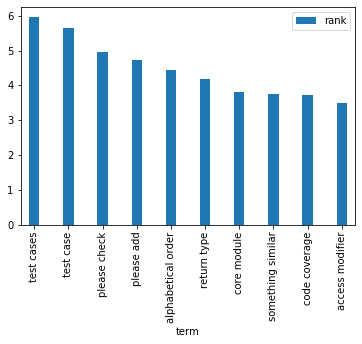

In [15]:
b =  words.head(10)
top_ten = b.plot.bar(x='term', y='rank', rot=90, width=0.3)

In [16]:
# Getting trigrams  
vectorizer = CountVectorizer(ngram_range = (3,3)) 
X1 = vectorizer.fit_transform(arr)  
features = (vectorizer.get_feature_names()) 
# print("\n\nFeatures : \n", features) 
# print("\n\nX1 : \n", X1.toarray()) 

In [17]:
# Applying TFIDF 
vectorizer = TfidfVectorizer(ngram_range = (3,3)) 
X2 = vectorizer.fit_transform(arr) 
scores = (X2.toarray()) 
# print("\n\nScores : \n", scores) 

In [18]:
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
ranking = pd.DataFrame(data1, columns = ['Comment','rank']) 
words = (ranking.sort_values('rank', ascending = False)) 
print ("\n\nWords head : \n", words.head(50)) 



Words head : 
                                      Comment      rank
4127                        move core module  2.980688
5600                     return type missing  2.707107
5036                            prime ng css  2.287486
433                     attach code coverage  2.179640
15                   access modifier missing  2.000000
3464                 keep alphabetical order  2.000000
4926             please update documentation  2.000000
1154               combine import statements  2.000000
1996                          dont use prime  1.999825
6992                            use prime ng  1.999825
103                            add test case  1.688068
4120                    move angular imports  1.686268
360               arrange alphabetical order  1.583346
5425                        rename file well  1.554990
6912                       use absolute path  1.478370
5113                 provide access modifier  1.414214
4900                   please provide access  1.

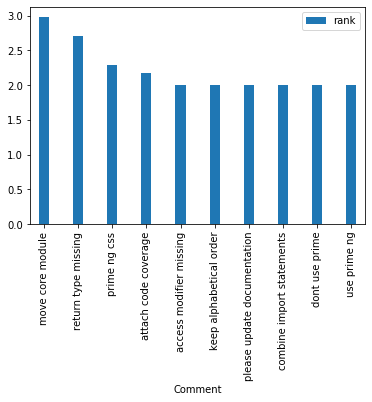

In [19]:
b =  words.head(10)
top_ten = b.plot.bar(x='Comment', y='rank', rot=90, width=0.3)

In [ ]:
#trigram wordcloud
# wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(str(words))
# plt.figure(figsize=(20,20))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()

In [ ]:
# plt.xticks(xpos,b)
# plt.ylabel("Frequency")
# plt.title('Comments')
# # plt.bar(xpos,height=100)

In [ ]:
# Getting quadgrams  
vectorizer = CountVectorizer(ngram_range = (4,4)) 
X1 = vectorizer.fit_transform(arr)  
features = (vectorizer.get_feature_names()) 
# print("\n\nFeatures : \n", features) 
# print("\n\nX1 : \n", X1.toarray()) 

In [ ]:
# Applying TFIDF 
vectorizer = TfidfVectorizer(ngram_range = (4,4)) 
X2 = vectorizer.fit_transform(arr) 
scores = (X2.toarray()) 
# print("\n\nScores : \n", scores) 

In [ ]:
# Getting top ranking features 
sums = X2.sum(axis = 0) 
data1 = [] 
for col, term in enumerate(features): 
    data1.append( (term, sums[0,col] )) 
ranking = pd.DataFrame(data1, columns = ['term','rank']) 
words = (ranking.sort_values('rank', ascending = False))
print ("\n\nWords head : \n", words.head(50)) 


In [ ]:
wordcloud = WordCloud(width=1600, height=800, max_font_size=200).generate(str(words))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# between_2_3 = words.where(words['rank'].between(2,3))
# between_1_2 = words.where(words['rank'].between(1.1,1.916418081414181))
# between_1_2.dropna()
# between_1_2.to_csv(r'c:\datasets\between_1_2.txt', header=None, index=None, sep=' ', mode='a')
# between_2_3.dropna()
# between_2_3.to_csv(r'c:\datasets\between_2_3.txt', header=None, index=None, sep=' ', mode='a')
# equal_1 = words.where(words['rank']==1.0)
# equal_1.dropna()
# equal_1.to_csv(r'c:\datasets\equal_1.txt', header=None, index=None, sep=' ', mode='a')
# # print ("\n\nWords head : \n", words.head(50)) 
# between_8_9 = words.where(words['rank'].between(0.80,0.91))
# between_8_9.dropna()
# between_8_9.to_csv(r'c:\datasets\between_8_9.txt', header=None, index=None, sep=' ', mode='a')
# between_7_8 = words.where(words['rank'].between(0.70,0.80))
# between_7_8 .dropna()
# between_7_8.to_csv(r'c:\datasets\between_7_8.txt', header=None, index=None, sep=' ', mode='a')
# between_65_66 = words.where(words['rank'].between(0.65,0.66))
# between_65_66.dropna()
# between_65_66.to_csv(r'c:\datasets\between_65_66.txt', header=None, index=None, sep=' ', mode='a')
# between_57_58 = words.where(words['rank'].between(0.57,0.58))
# between_57_58.dropna()
# between_57_58.to_csv(r'c:\datasets\between_57_58.txt', header=None, index=None, sep=' ', mode='a')
# between_50_56 = words.where(words['rank'].between(0.50,0.56))
# between_50_56.dropna()
# between_50_56.to_csv(r'c:\datasets\between_50_56.txt', header=None, index=None, sep=' ', mode='a')
# between_40_50 = words.where(words['rank'].between(0.40,0.49))
# between_40_50.dropna()
# between_40_50.to_csv(r'c:\datasets\between_40_50.txt', header=None, index=None, sep=' ', mode='a')